In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from scipy import stats

In [ ]:
vehicle = pd.read_csv("data.csv")

In [ ]:
vehicle = vehicle[vehicle['horsepower'] != "?" ]

In [ ]:
vehicle = vehicle.reset_index(drop = True)

In [ ]:
vehicle["horsepower"] = vehicle["horsepower"].astype(int)

In [ ]:
vehicle = pd.read_csv("/content/data.csv")
vehicle.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [ ]:
vehicle.tail()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024
397,1,4,119.0,82,2720,19.4,1982,chevy s-10,13.179455


In [ ]:
vehicle.shape

(398, 9)

In [ ]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
vehicle.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [ ]:
vehicle.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [ ]:
vehicle.describe

<bound method NDFrame.describe of      origin  cylinders  displacement horsepower  weight  acceleration  year  \
0         1          8         307.0        130    3504          12.0  1970   
1         1          8         350.0        165    3693          11.5  1970   
2         1          8         318.0        150    3436          11.0  1970   
3         1          8         304.0        150    3433          12.0  1970   
4         1          8         302.0        140    3449          10.5  1970   
..      ...        ...           ...        ...     ...           ...   ...   
393       1          4         140.0         86    2790          15.6  1982   
394       2          4          97.0         52    2130          24.6  1982   
395       1          4         135.0         84    2295          11.6  1982   
396       1          4         120.0         79    2625          18.6  1982   
397       1          4         119.0         82    2720          19.4  1982   

                 

In [ ]:
vehicle.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

In [ ]:
print(vehicle['displacement'].value_counts())

97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: displacement, Length: 82, dtype: int64


In [ ]:
print(vehicle['weight'].value_counts())

1985    4
2130    4
2125    3
2945    3
2265    3
       ..
2875    1
3102    1
3664    1
2807    1
2625    1
Name: weight, Length: 351, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

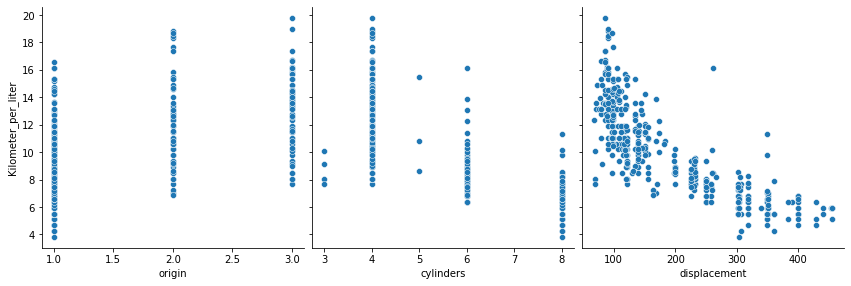

In [ ]:
sns.pairplot(vehicle, x_vars=['origin','cylinders','displacement'], y_vars='Kilometer_per_liter',size=4, aspect=1, kind='scatter')
plt.show()

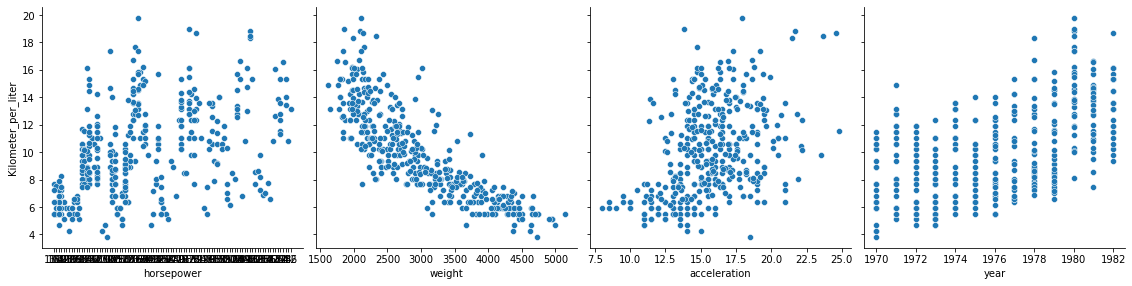

In [ ]:
sns.pairplot(vehicle, x_vars=['horsepower','weight','acceleration','year'], y_vars='Kilometer_per_liter',size=4, aspect=1, kind='scatter')
plt.show()

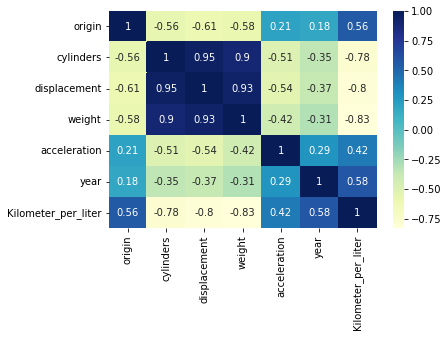

In [ ]:
sns.heatmap(vehicle.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
x=vehicle["cylinders"]
y=vehicle["displacement"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 15000)

In [ ]:
X_train.head()

254    2965
393    2790
322    2110
149    2489
95     4951
Name: weight, dtype: int64

In [ ]:
y_train.head()

254     8.587903
393    11.478880
322    19.811697
149    10.203449
95      5.101724
Name: Kilometer_per_liter, dtype: float64

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

const     19.207177
weight    -0.003120
dtype: float64

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.702
Model:                             OLS   Adj. R-squared:                  0.701
Method:                  Least Squares   F-statistic:                     651.5
Date:                 Tue, 30 Aug 2022   Prob (F-statistic):           1.30e-74
Time:                         05:45:20   Log-Likelihood:                -542.36
No. Observations:                  278   AIC:                             1089.
Df Residuals:                      276   BIC:                             1096.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.2072      0.380     50.48

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

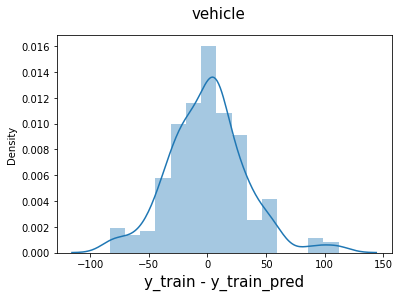

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('vehicle', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

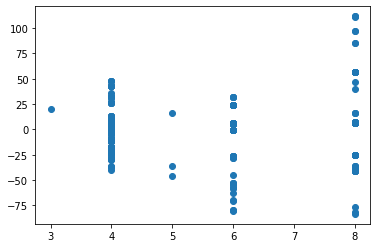

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

173    108.255550
301    108.255550
375    108.255550
203    108.255550
37     225.784328
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

30.57602499111987

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.91295477281791

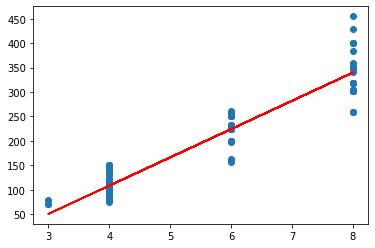

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, -122.85 + 57.82 * X_test, 'r')
plt.show()